# Aplicação de Python na Agrometeorologia

Este Jupyter Notebook é parte integrande do curso de Python ministrado durante XXII Congresso Brasiliero de Agrometeorologia realizado nos dias 3, 4 e 5 de outubro de 2023 na cidade Natal/RN.

# Importação de bibliotecas

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Abertura do arquivo csv

Tratamento da coluna 'Dia' do DataFrame como DateTime e depois converte em index.

In [31]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

df = pd.read_csv(
    '../output/chuva_diaria_cpc_19910901_20221231.csv',
    index_col='Dia', 
    parse_dates=True  
)

In [23]:
#Outra possibilidade de tratar a coluna 'Dia' como DateTime e depois converter em index:
# df['Dia'] = pd.to_datetime(df['Dia'])
# df.set_index('Dia', inplace=True)

Inspeção do DataFrame.

In [24]:
df

,Chuva
Dia,
1991-01-01,1.083005
1991-01-02,1.132334
1991-01-03,1.101605
1991-01-04,1.662441
1991-01-05,1.765939
...,...
2022-12-27,0.583862
2022-12-28,0.579153
2022-12-29,1.396807


Plot básico do DataFrame.

<AxesSubplot:xlabel='Dia'>

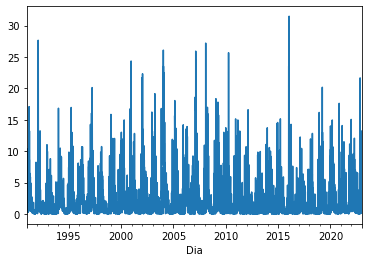

In [25]:
df['Chuva'].plot() # Outra possibilidade: df.Chuva.plot()

# Algumas transformações no DataFrame

## Acumulado sazonal

In [26]:
acumulado_sazonal1 = df.resample('QS-DEC').sum()

acumulado_sazonal1

,Chuva
Dia,
1990-12-01,179.993587
1991-03-01,292.889083
1991-06-01,53.496950
1991-09-01,81.786779
1991-12-01,406.707208
...,...
2021-12-01,313.040377
2022-03-01,325.633091
2022-06-01,144.470741


Formata a data sem o dia.

In [27]:
acumulado_sazonal1.index = acumulado_sazonal1.index.strftime('%Y-%m')

acumulado_sazonal1

,Chuva
Dia,
1990-12,179.993587
1991-03,292.889083
1991-06,53.496950
1991-09,81.786779
1991-12,406.707208
...,...
2021-12,313.040377
2022-03,325.633091
2022-06,144.470741


Plot básico da variável.

<AxesSubplot:xlabel='Dia'>

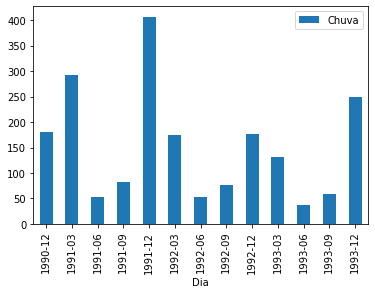

In [28]:
acumulado_sazonal1[0:13].plot.bar()

Seleciona somente a estação DJF.

In [29]:
acumulado_sazonal1[0::4]['Chuva'].index

Index(['1990-12', '1991-12', '1992-12', '1993-12', '1994-12', '1995-12',
       '1996-12', '1997-12', '1998-12', '1999-12', '2000-12', '2001-12',
       '2002-12', '2003-12', '2004-12', '2005-12', '2006-12', '2007-12',
       '2008-12', '2009-12', '2010-12', '2011-12', '2012-12', '2013-12',
       '2014-12', '2015-12', '2016-12', '2017-12', '2018-12', '2019-12',
       '2020-12', '2021-12', '2022-12'],
      dtype='object', name='Dia')

Criando um painel **plotando TODOS** os DJF, MAM, JJA e SON separadamente.

<ipython-input-30-dfb0e19d8c28>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(acumulado_sazonal1.index[0::4], rotation=90)
<ipython-input-30-dfb0e19d8c28>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(acumulado_sazonal1.index[1::4], rotation=90)
<ipython-input-30-dfb0e19d8c28>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(acumulado_sazonal1.index[2::4], rotation=90)
<ipython-input-30-dfb0e19d8c28>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(acumulado_sazonal1.index[3::4], rotation=90)


[Text(0, 0, '1991-09'),
 Text(1, 0, '1992-09'),
 Text(2, 0, '1993-09'),
 Text(3, 0, '1994-09'),
 Text(4, 0, '1995-09'),
 Text(5, 0, '1996-09'),
 Text(6, 0, '1997-09'),
 Text(7, 0, '1998-09'),
 Text(8, 0, '1999-09'),
 Text(9, 0, '2000-09'),
 Text(10, 0, '2001-09'),
 Text(11, 0, '2002-09'),
 Text(12, 0, '2003-09'),
 Text(13, 0, '2004-09'),
 Text(14, 0, '2005-09'),
 Text(15, 0, '2006-09'),
 Text(16, 0, '2007-09'),
 Text(17, 0, '2008-09'),
 Text(18, 0, '2009-09'),
 Text(19, 0, '2010-09'),
 Text(20, 0, '2011-09'),
 Text(21, 0, '2012-09'),
 Text(22, 0, '2013-09'),
 Text(23, 0, '2014-09'),
 Text(24, 0, '2015-09'),
 Text(25, 0, '2016-09'),
 Text(26, 0, '2017-09'),
 Text(27, 0, '2018-09'),
 Text(28, 0, '2019-09'),
 Text(29, 0, '2020-09'),
 Text(30, 0, '2021-09'),
 Text(31, 0, '2022-09')]

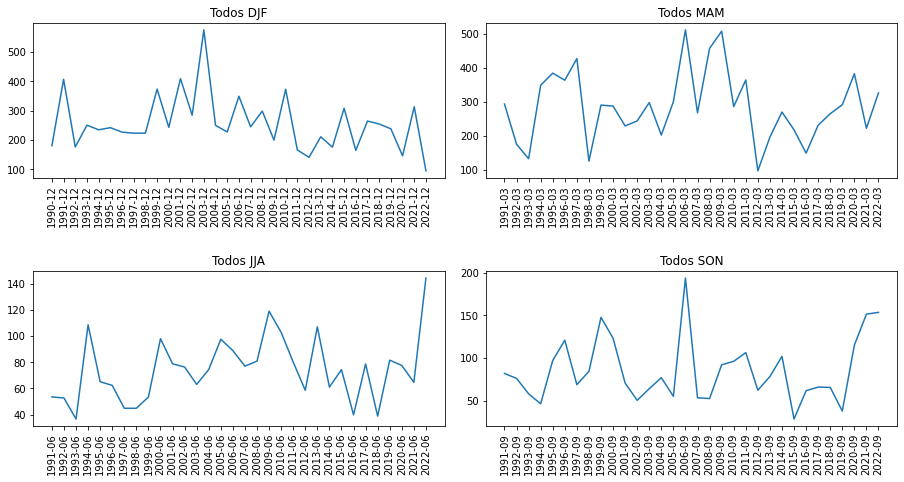

In [30]:
# Documentação:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, ax = plt.subplots(figsize=(15,7), ncols=2, nrows=2)

# Ajuste o espaçamento entre os subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.6)

# Todos os DJF:
ax[0,0].plot(acumulado_sazonal1[0::4])
ax[0,0].set_title('Todos DJF')
ax[0,0].set_xticklabels(acumulado_sazonal1.index[0::4], rotation=90)

# Todos os MAM:
ax[0,1].plot(acumulado_sazonal1[1::4])
ax[0,1].set_title('Todos MAM')
ax[0,1].set_xticklabels(acumulado_sazonal1.index[1::4], rotation=90)

# Todos os JJA:
ax[1,0].plot(acumulado_sazonal1[2::4])
ax[1,0].set_title('Todos JJA')
ax[1,0].set_xticklabels(acumulado_sazonal1.index[2::4], rotation=90)

# Todos os SON:
ax[1,1].plot(acumulado_sazonal1[3::4])
ax[1,1].set_title('Todos SON')
ax[1,1].set_xticklabels(acumulado_sazonal1.index[3::4], rotation=90)

# Salva a figura.
#plt.savefig('painel.png')